In [4]:
from google.colab import files
files.upload()  # Upload kaggle.json here


Saving kaggle.json to kaggle (1).json


{'kaggle (1).json': b'{"username":"kanijxfatema","key":"8a0adbcf90a4e5aedefcc2a3d2050a95"}'}

In [5]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [6]:
!kaggle --version

Kaggle API 1.6.17


In [7]:
!kaggle datasets download -d zeeshier/student-admission-records/

Dataset URL: https://www.kaggle.com/datasets/zeeshier/student-admission-records/versions/
License(s): CC0-1.0
  0% 0.00/2.06k [00:00<?, ?B/s]
100% 2.06k/2.06k [00:00<00:00, 5.54MB/s]


In [8]:
import zipfile
with zipfile.ZipFile('/content/student-admission-records.zip', 'r') as zip_ref:
    zip_ref.extractall('data_folder')

In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [10]:
df = pd.read_csv("/content/data_folder/student_admission_record_dirty.csv")

In [11]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

import warnings
warnings.filterwarnings("ignore", category=FutureWarning, module="seaborn")

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

In [12]:
df.shape

(157, 7)

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   name        147 non-null    object 
 1   age         157 non-null    float64
 2   gender      147 non-null    object 
 3   test_score  157 non-null    float64
 4   hs_perc     157 non-null    float64
 5   city        147 non-null    object 
 6   adm_status  147 non-null    object 
dtypes: float64(3), object(4)
memory usage: 8.7+ KB


In [14]:
df.sample(12).T

,106,36,43,120,134,11,129,152,80,77,107,142
Name,Mehwish,Ayesha,Waqar,Ayesha,Shahzad,Nashit,Aliya,Ali,Mehwish,Tuba,Zunaira,Sana
Age,21.0,24.0,21.0,24.0,24.0,18.0,19.0,19.0,18.0,18.0,20.0,22.0
Gender,Female,Male,Female,Male,Female,Male,Male,Female,Female,Female,Female,Female
Admission Test Score,91.0,94.0,99.0,94.0,74.0,89.0,79.0,85.0,72.0,89.0,98.0,91.0
High School Percentage,57.33,98.43,60.73,98.43,74.13,NaN,91.85,78.09,67.51,71.3,54.59,84.08
City,Rawalpindi,Multan,Karachi,Multan,Multan,Lahore,Islamabad,Quetta,Quetta,Karachi,Quetta,Quetta
Admission Status,Accepted,Rejected,Accepted,Rejected,Rejected,Accepted,Rejected,Accepted,Accepted,Accepted,Accepted,Rejected


In [15]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,147.0,19.680272,4.540512,-1.0,18.0000,20.000,22.0000,24.0
Admission Test Score,146.0,77.657534,16.855343,-5.0,68.2500,79.000,89.0000,150.0
High School Percentage,146.0,75.684726,17.368014,-10.0,65.0525,77.545,88.3125,110.5


In [16]:
df.isna().sum()

,0
Name,10
Age,10
Gender,10
Admission Test Score,11
High School Percentage,11
City,10
Admission Status,10


In [17]:
# Shows rows with at least one NaN values
df[df.isna().any(axis=1)]

,Name,Age,Gender,Admission Test Score,High School Percentage,City,Admission Status
1,Waqar,21.0,Female,99.0,60.73,Karachi,NaN
2,Bushra,17.0,Male,89.0,NaN,Islamabad,Accepted
4,Bilal,20.0,Male,65.0,61.13,Lahore,NaN
5,Murtaza,23.0,Female,NaN,NaN,Islamabad,Accepted
6,Asad,18.0,Male,NaN,97.31,Multan,Accepted
8,Rohail,17.0,Male,64.0,NaN,Karachi,Accepted
11,Nashit,18.0,Male,89.0,NaN,Lahore,Accepted
12,NaN,19.0,Male,66.0,88.17,NaN,NaN
16,Mahnoor,NaN,Male,61.0,74.08,Islamabad,Rejected
19,NaN,19.0,Male,84.0,NaN,Islamabad,Rejected


In [18]:
df = df.rename({
    "Name": "name",
    "Age": "age",
    "Gender": "gender",
    "Admission Test Score": "test_score",
    "High School Percentage": "hs_perc",
    "City": "city",
    "Admission Status": "adm_status",
}, axis=1)

In [19]:
df.tail(3)

,name,age,gender,test_score,hs_perc,city,adm_status
154,Fatima,21.0,Female,98.0,50.86,Multan,Accepted
155,Shoaib,-1.0,Male,91.0,80.12,Quetta,Accepted
156,Maaz,17.0,Male,88.0,86.85,Lahore,Accepted


Text(0.5, 1.0, 'Some H.S. percentages are too distant from the typical range')

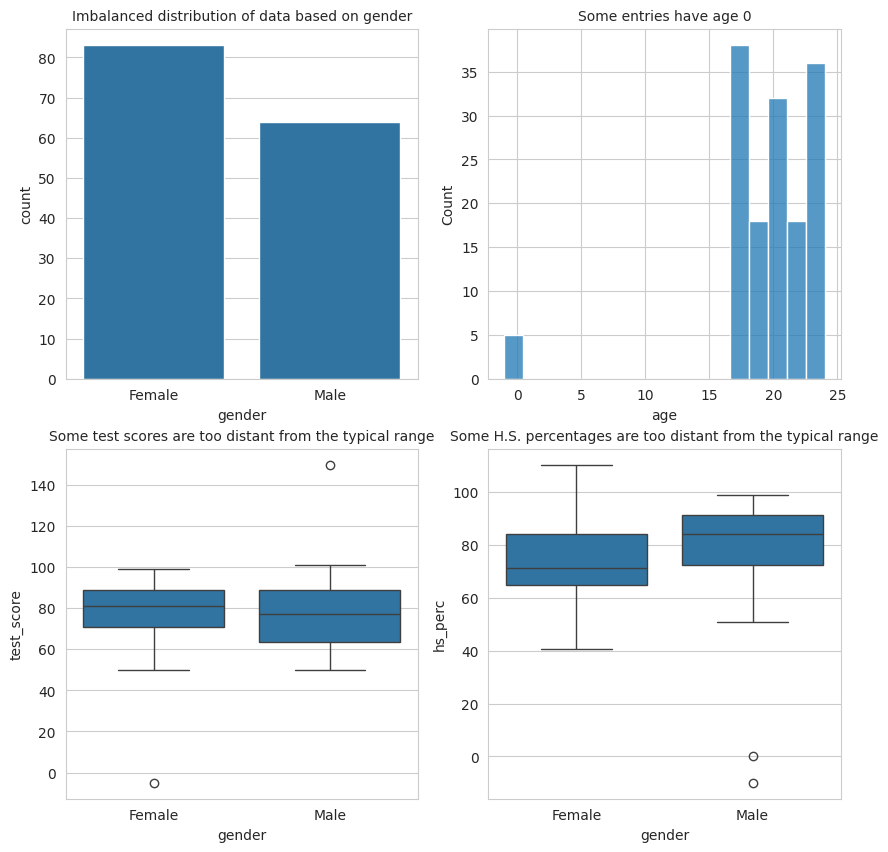

In [20]:
fig, [[ax1, ax2], [ax3, ax4]] = plt.subplots(2,2, figsize=(10,10))

sns.countplot(df, x="gender", ax=ax1)
ax1.set_title("Imbalanced distribution of data based on gender", fontsize=10)

sns.histplot(df, x="age", ax=ax2)
ax2.set_title("Some entries have age 0", fontsize=10)

sns.boxplot(df, x="gender", y="test_score", ax=ax3)
ax3.set_title("Some test scores are too distant from the typical range", fontsize=10)

sns.boxplot(df, x="gender", y="hs_perc", ax=ax4)
ax4.set_title("Some H.S. percentages are too distant from the typical range", fontsize=10)


Text(0.5, 0.98, 'Anamolies visible in scatter plot')

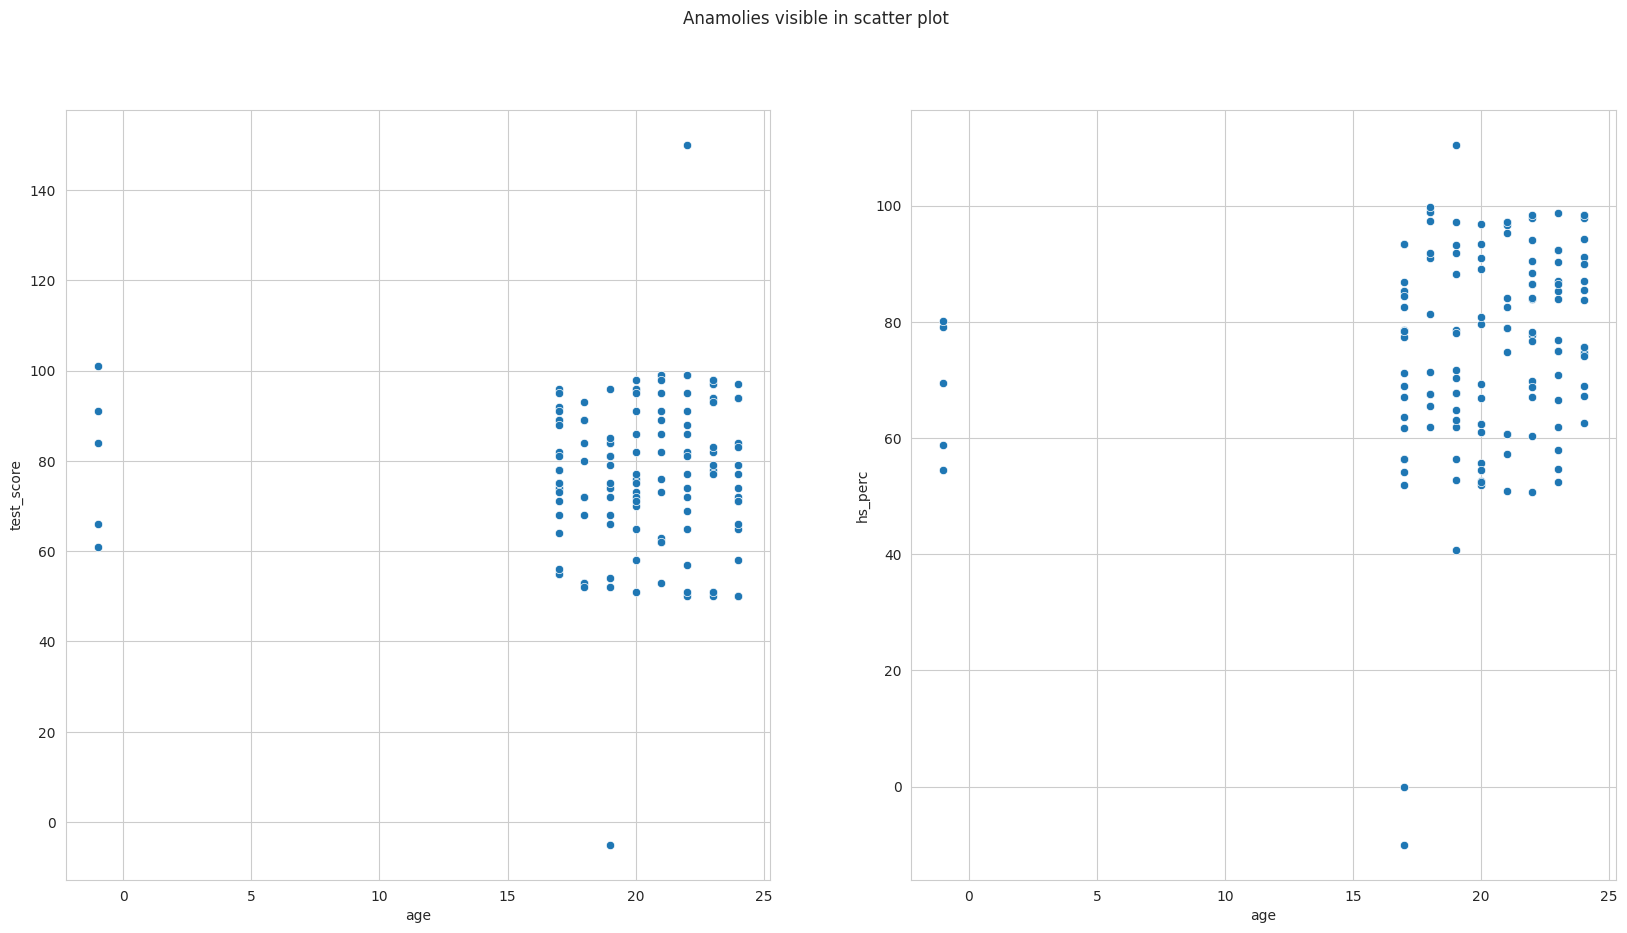

In [21]:
fig, [ax1, ax2] = plt.subplots(1,2, figsize=(20,10))

sns.scatterplot(df, x="age", y="test_score", ax=ax1)

sns.scatterplot(df, x="age", y="hs_perc", ax=ax2)


fig.suptitle("Anamolies visible in scatter plot")

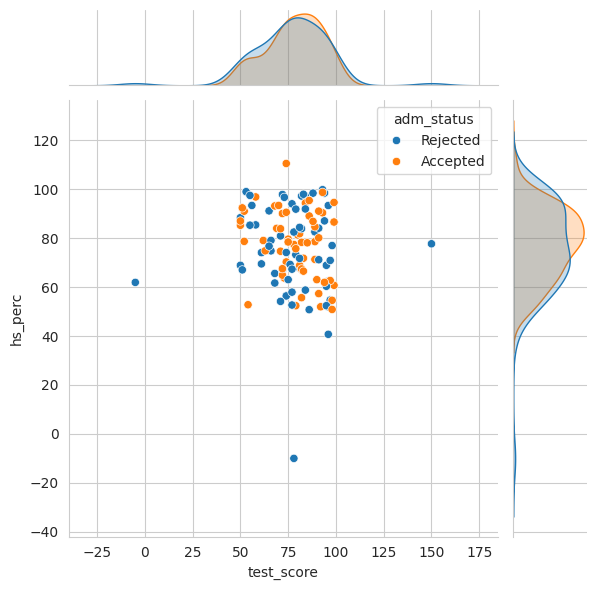

In [22]:
sns.jointplot(df, x="test_score", y="hs_perc", hue="adm_status")

In [23]:
df["age"].value_counts()

,count
age,
17.0,24
23.0,19
19.0,18
22.0,18
24.0,17
20.0,17
21.0,15
18.0,14
-1.0,5


<Axes: xlabel='age', ylabel='count'>

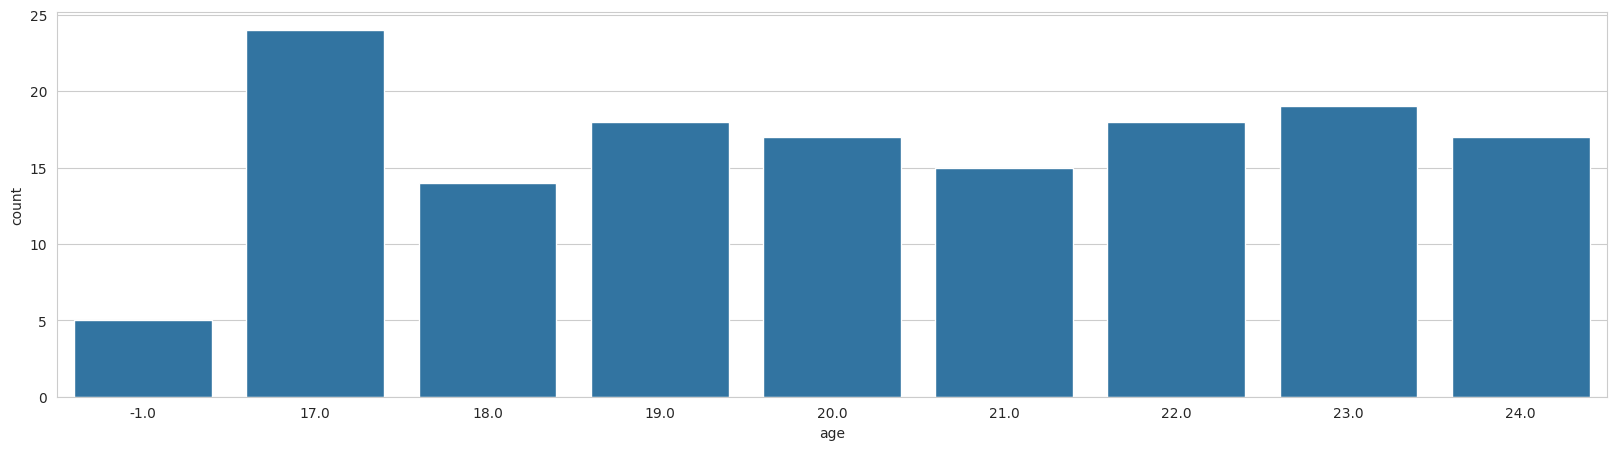

In [24]:
plt.subplots(1,1, figsize=(20,5))

sns.countplot(df, x="age")

<Axes: xlabel='age', ylabel='Count'>

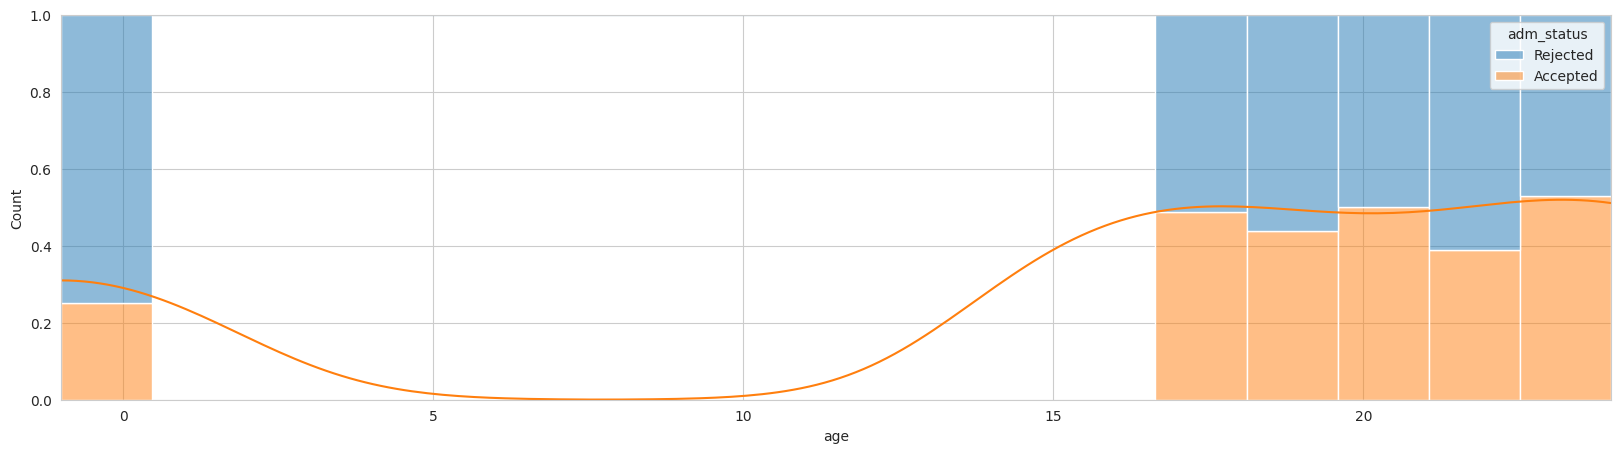

In [25]:
plt.subplots(1,1,figsize=(20,5))

sns.histplot(df, x="age", hue="adm_status", multiple="fill", kde=True)

<Axes: xlabel='city', ylabel='Count'>

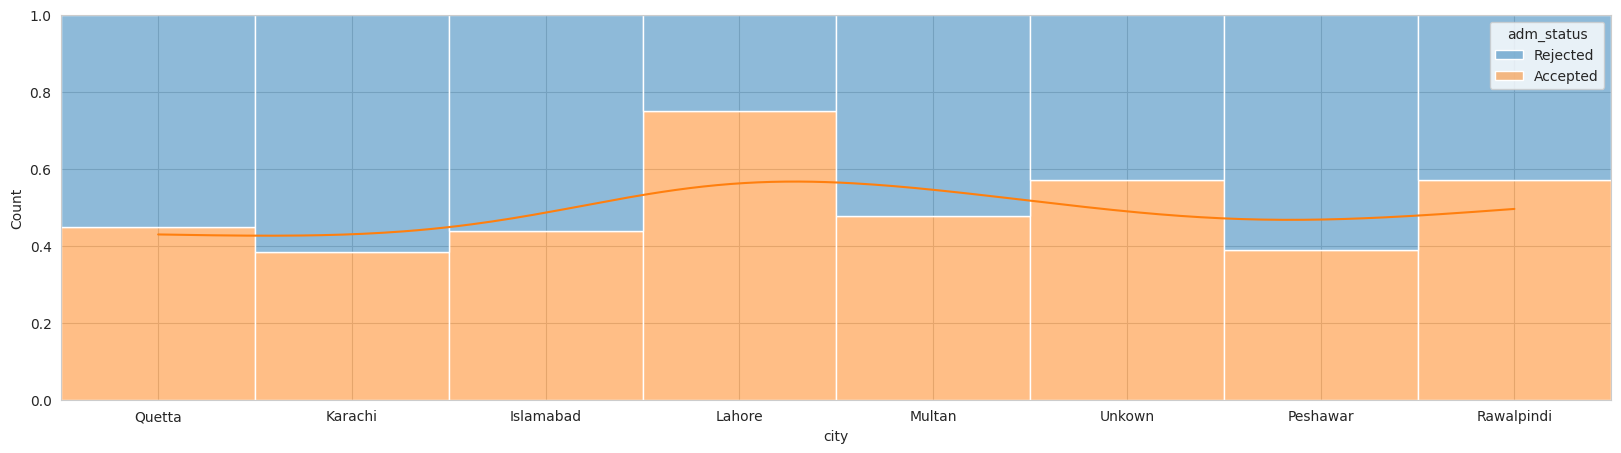

In [26]:
plt.subplots(1,1,figsize=(20,5))

sns.histplot(df.fillna({"city":"Unkown"}), x="city", hue="adm_status", multiple="fill", kde=True)

In [27]:
df = df.fillna({
    "hs_perc": "Unknown"
})

df.head(10).T

,0,1,2,3,4,5,6,7,8,9
name,Shehroz,Waqar,Bushra,Aliya,Bilal,Murtaza,Asad,Rabia,Rohail,Kamran
age,24.0,21.0,17.0,17.0,20.0,23.0,18.0,20.0,17.0,18.0
gender,Female,Female,Male,Male,Male,Female,Male,Female,Male,Male
test_score,50.0,99.0,89.0,55.0,65.0,NaN,NaN,82.0,64.0,53.0
hs_perc,68.9,60.73,Unknown,85.29,61.13,Unknown,97.31,55.67,Unknown,98.98
city,Quetta,Karachi,Islamabad,Karachi,Lahore,Islamabad,Multan,Lahore,Karachi,Multan
adm_status,Rejected,NaN,Accepted,Rejected,NaN,Accepted,Accepted,Accepted,Accepted,Rejected


In [28]:
def iqr_fence(x):
    """
        Calculates the lower and upper fence for the plot
    """
    Q1 = x.quantile(0.25)
    Q3 = x.quantile(0.75)
    IQR = Q3 - Q1
    lower_fence = Q1 - (1.5 * IQR)
    upper_fence = Q3 + (1.5 * IQR)
    u = max(x[x<upper_fence])
    l = min(x[x>lower_fence])

    return (l, u)

In [29]:
l,u = iqr_fence(df["test_score"])
df["test_score"] = df["test_score"].clip(l, u) # Removing the anamolies by clamping values between the whiskers in the boxplot

In [30]:
df["hs_perc"] = df["hs_perc"].replace("Unknown", np.nan)

<ipython-input-30-90e75d12377d>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["hs_perc"] = df["hs_perc"].replace("Unknown", np.nan)


In [34]:
l,u = iqr_fence(df["hs_perc"])
df["hs_perc"] = df["hs_perc"].clip(l, u)

In [33]:
df = df.fillna({
    "test_score": df["test_score"].mean(), # Filling up nan values with mean score
    "hs_perc": df["hs_perc"].mean(), # Filling up nan values with mean score
})

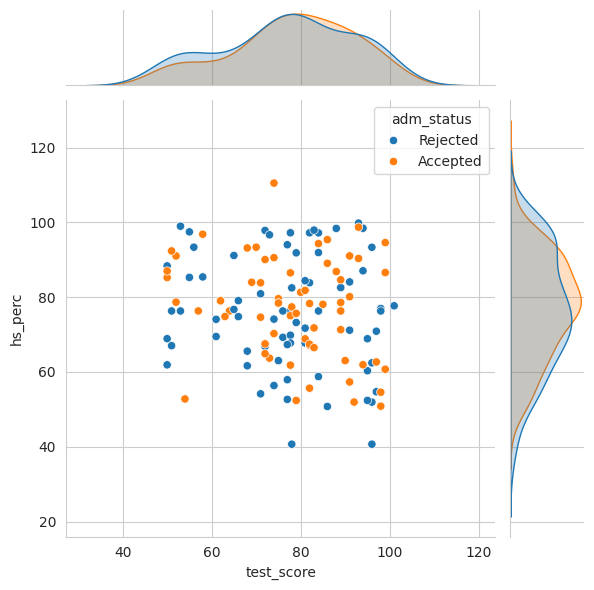

In [35]:
sns.jointplot(df, x="test_score", y="hs_perc", hue="adm_status")

In [36]:
# Since, there is not much fluctuation in acceptance rate from age
# We can fill up the missing values with the mean

# df["age"].fillna(df["age"].mean())

# We do this later because the mean is sensitive to extremities
# First, we remove such extremities

l, u = iqr_fence(df["age"])
df["age"] = df["age"].clip(l,u)

In [37]:
df["age"] = df["age"].fillna(df["age"].mean())


Text(0.5, 1.0, 'Anamolies for age have been removed')

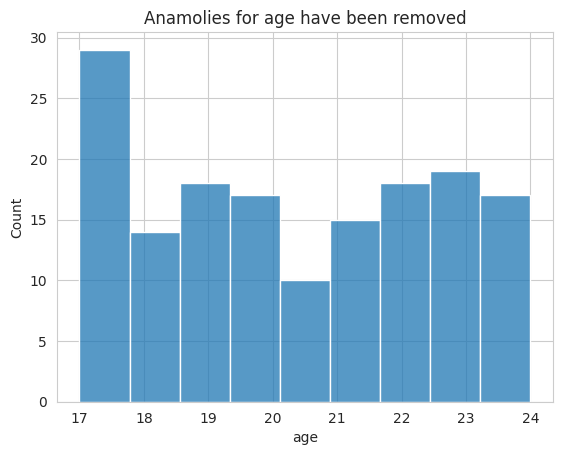

In [38]:
sns.histplot(df, x="age")
plt.title("Anamolies for age have been removed")

Same plots after Cleaning

Text(0.5, 1.0, 'Some H.S. percentages are too distant from the typical range')

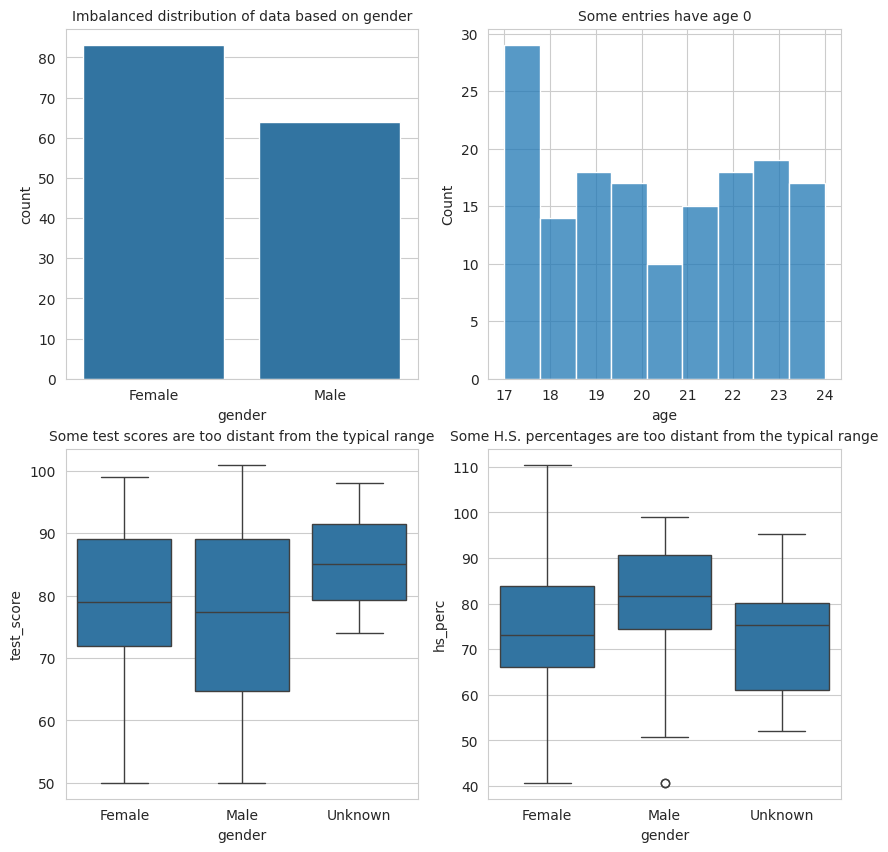

In [41]:
fig, [[ax1, ax2], [ax3, ax4]] = plt.subplots(2,2, figsize=(10,10))

sns.countplot(df, x="gender", ax=ax1)
ax1.set_title("Imbalanced distribution of data based on gender", fontsize=10)

sns.histplot(df, x="age", ax=ax2)
ax2.set_title("Some entries have age 0", fontsize=10)

sns.boxplot(df.fillna({"gender": "Unknown"}), x="gender", y="test_score", ax=ax3)
ax3.set_title("Some test scores are too distant from the typical range", fontsize=10)
sns.boxplot(df.fillna({"gender": "Unknown"}), x="gender", y="hs_perc", ax=ax4)
ax4.set_title("Some H.S. percentages are too distant from the typical range", fontsize=10)

NaN values for Admission Status
Looking at the plots, the relationship between the predictors and the target(Admission Status) is weak. As such, the rows with NaN values in the target must be removed.

In [42]:
df = df.drop("name", axis=1) # Name column can be dropped

In [43]:
df = df.fillna({
    "gender": "Unknown", # As seen in chart 3, unknown gender have some influence
    # This will be used to generate dummies later on
})

In [44]:
df = df[df["adm_status"].notna()]

In [45]:
print("No remaining NaN values")
df.isna().sum()

No remaining NaN values


,0
age,0
gender,0
test_score,0
hs_perc,0
city,7
adm_status,0


In [46]:
df.sample(12).T

,107,135,41,88,58,105,141,6,111,52,82,103
age,20.0,20.292517,22.0,17.0,20.0,17.0,21.0,18.0,24.0,21.0,24.0,19.0
gender,Female,Male,Female,Male,Female,Male,Female,Male,Male,Male,Female,Female
test_score,98.0,55.0,50.0,55.0,70.0,56.0,76.0,77.69863,71.0,62.0,97.0,96.0
hs_perc,54.59,97.46,88.36,85.29,93.36,93.36,76.310753,97.31,74.65,79.03,62.68,40.7
city,Quetta,Quetta,Quetta,Karachi,Lahore,Karachi,Karachi,Multan,Lahore,Karachi,Lahore,Rawalpindi
adm_status,Accepted,Rejected,Rejected,Rejected,Accepted,Rejected,Rejected,Accepted,Accepted,Accepted,Accepted,Rejected


In [47]:
df.shape # Only 10 rows lost

(147, 6)

Data Preparation

In [48]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

y = (df["adm_status"] == "Accepted").astype(int)
X = df.drop("adm_status", axis=1)

In [49]:
preprocessor = ColumnTransformer(
    transformers= [
        ("num", StandardScaler(), ["age","test_score","hs_perc"]),
        ("cat", OneHotEncoder(drop="first"), ["gender","city"])
    ]
)

In [50]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [51]:
# Preprocessing
preprocessor = preprocessor.fit(X_train)
X_train = preprocessor.transform(X_train)
X_test = preprocessor.transform(X_test)

In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier

In [53]:
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score, confusion_matrix

# Evaluating
error_dfs = []
def train_and_generate_error(model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)

    error_df = pd.DataFrame([], columns=["Error Name","Error Value","Error Range"])

    def generate_error_row(error_name: str, err_val: float, range: str):
        error_df.loc[len(error_df)] = [error_name, err_val, range]

    generate_error_row("Accuracy", acc, "[0, 1]")
    generate_error_row("Precision", precision, "[0, 1]")
    generate_error_row("F1 score", f1, "[0, 1]")
    generate_error_row("Recall", recall, "[0, 1]")

    error_dfs.append(error_df)

In [54]:
error_dfs = []

train_and_generate_error(LogisticRegression())
train_and_generate_error(SVC(class_weight='balanced', max_iter=3000))
train_and_generate_error(dtree_model := DecisionTreeClassifier(max_features="log2"))
train_and_generate_error(mlp_model := MLPClassifier(max_iter=500, hidden_layer_sizes=(32, 64,)))
train_and_generate_error(RandomForestClassifier(n_estimators=200))

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


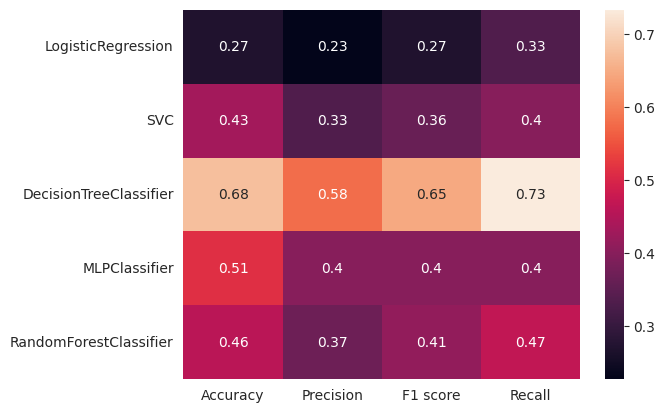

In [55]:
# Heatmapping errors on different models
model_names = ["LogisticRegression", "SVC", "DecisionTreeClassifier", "MLPClassifier", "RandomForestClassifier"]

def plot_model_perf_heatmap(model_names):
    error_values = {model_names[i] : list(map(lambda err: err[1], mdl.values)) for i, mdl in enumerate(error_dfs)}

    model_error_df = pd.DataFrame(error_values, index=["Accuracy","Precision","F1 score","Recall"]).T
    sns.heatmap(model_error_df, annot=True)

plot_model_perf_heatmap(model_names)

In [56]:
import shap

X_train = pd.DataFrame(X_train, columns=preprocessor.get_feature_names_out())
X_test = pd.DataFrame(X_test, columns=preprocessor.get_feature_names_out())

In [57]:
def calculate_shap_values(model):
    background = shap.sample(X_train, 5)  # Use 100 samples for background
    explainer = shap.KernelExplainer(model.predict_proba, background)

    # Calculate SHAP values for test set
    return explainer.shap_values(X_test)

def show_shap_chart(model, title):
    shap_values = calculate_shap_values(model)

    plt.figure(figsize=(10, 6))
    # If binary classification, use shap_values[1] for the positive class
    # If multiclass, you might want to look at a specific class
    shap.summary_plot(shap_values[1], X_test,
                     plot_type="bar",
                     show=False,
                     plot_size=(10, 6))

    # Customize the plot
    plt.title(title, pad=20)
    plt.xlabel('mean(|SHAP value|)')

    # Adjust layout
    plt.tight_layout()

In [59]:
def calculate_shap_values(model):
    # Use a larger sample size for background data, up to 10% of the training set
    background_size = min(100, int(0.1 * len(X_train)))
    background = shap.sample(X_train, background_size)
    explainer = shap.KernelExplainer(model.predict_proba, background)

    # Calculate SHAP values for test set
    return explainer.shap_values(X_test)

def show_shap_chart(model, title):
    shap_values = calculate_shap_values(model)

    plt.figure(figsize=(10, 6))

    # If binary classification, ensure you are using the correct class index
    # If multiclass, you might want to look at a specific class or iterate
    # Check if it's binary or multi-class classification
    if len(shap_values) == 2:  # Binary classification
        shap.summary_plot(shap_values[1], X_test,  # Index 1 for the positive class
                         plot_type="bar",
                         show=False,
                         plot_size=(10, 6))
    else:  # Multi-class classification
        # Iterate through classes or select a specific class
        for i in range(len(shap_values)):
            shap.summary_plot(shap_values[i], X_test,
                             plot_type="bar",
                             show=False,
                             plot_size=(10, 6))
            plt.title(f"{title} - Class {i}")
            plt.show()


    # Customize the plot
    plt.title(title, pad=20)
    plt.xlabel('mean(|SHAP value|)')

    # Adjust layout
    plt.tight_layout()

In [72]:
from sklearn.preprocessing import LabelEncoder

# Create a label encoder instance
encoder = LabelEncoder()

# Assuming 'gender' column has 'male', 'female', and possibly other categories
df['gender'] = encoder.fit_transform(df['gender'])


In [74]:
# Assuming 'gender' is the column containing numeric values (0 and 1)
df['gender'] = df['gender'].astype(str)


In [75]:
# If the column has numeric values like 0 and 1, map them back to 'male' and 'female'
df['gender'] = df['gender'].map({0: 'male', 1: 'female'})


In [76]:
# Convert the 'gender' column to a categorical type
df['gender'] = pd.Categorical(df['gender'])


In [77]:
df['gender'] = df['gender'].replace({0: 'male', 1: 'female'})


In [84]:
pip install shap


Decision Tree Regression - Mean Squared Error: 4.0
Decision Tree Regression - R²: nan


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


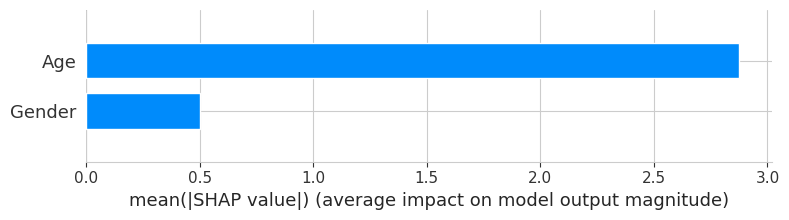

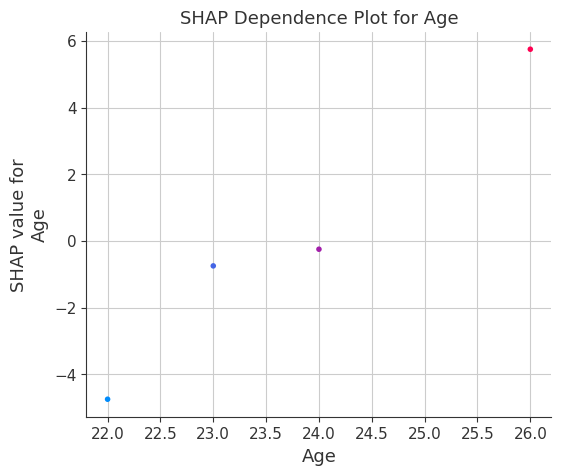

In [91]:
import shap
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score


df = pd.DataFrame(data)

# Preprocessing: Convert 'Gender' from categorical to numeric (0 for Male, 1 for Female)
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})

# Features (X) and Target (y)
X = df[['Age', 'Gender']]
y = df['Admission Test Score']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Decision Tree Model
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

# Predict
y_pred_dt = dt_model.predict(X_test)

# Evaluate Model
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print(f"Decision Tree Regression - Mean Squared Error: {mse_dt}")
print(f"Decision Tree Regression - R²: {r2_dt}")

# SHAP Values - Using TreeExplainer to explain Decision Tree model
explainer = shap.TreeExplainer(dt_model)
shap_values = explainer.shap_values(X_train)

# SHAP Summary Plot (Feature Importance)
shap.summary_plot(shap_values, X_train, plot_type="bar", title="Feature Importance Based on SHAP Values")

# SHAP Dependence Plot (Optional, for a single feature vs the output)
shap.dependence_plot('Age', shap_values, X_train, title="SHAP Dependence Plot for Age")


In [87]:
show_shap_chart(dtree_model, "Feature Importance Based on SHAP Values in Decision Tree Model")

InvalidParameterError: The 'n_samples' parameter of resample must be an int in the range [1, inf) or None. Got 0 instead.

In [60]:
show_shap_chart(mlp_model, "Feature Importance Based on SHAP Values in MLPClassifier Model")

  0%|          | 0/37 [00:00<?, ?it/s]

AssertionError: The shape of the shap_values matrix does not match the shape of the provided data matrix.

<Figure size 1000x600 with 0 Axes>

Some Catboost integration

In [79]:
cat_features = ["city", "gender"]
X[cat_features] = X[cat_features].apply(lambda col: col.astype('category'))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [88]:
from catboost import CatBoostClassifier, Pool


cb_model = CatBoostClassifier(
    iterations=1000,
    depth=10,
    learning_rate=0.05,
    loss_function='Logloss',
    cat_features=cat_features,
    verbose=200
)

ModuleNotFoundError: No module named 'catboost'

In [81]:
train_and_generate_error(CatBoostClassifier(
    iterations=5000,
    depth=10,
    learning_rate=0.05,
    loss_function='Logloss',
    cat_features=cat_features,
    verbose=200
))

NameError: name 'CatBoostClassifier' is not defined

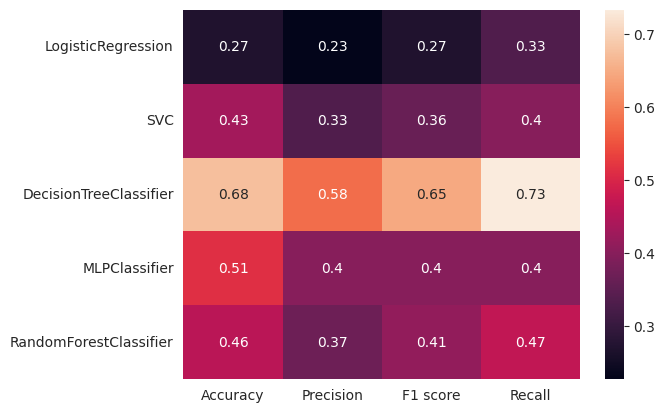

In [82]:
plot_model_perf_heatmap([*model_names, "CatBoostClassifier"])